In [8]:
import matplotlib 
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np

In [9]:
VEHICLE_X = 20
VEHICLE_Y = 0
VEHICLE_WIDTH = 20 #Fixed
VEHICLE_LENGTH = 30 #Fixed

OBSTACLE_X = 0
OBSTACLE_Y = 150
OBSTACLE_WIDTH = 20
OBSTACLE_LENGTH = 50

OBSTACLE_MOVING_X = 40
OBSTACLE_MOVING_Y = 450
OBSTACLE_MOVING_WIDTH = 30
OBSTACLE_MOVING_LENGTH = 50

VEHICLE_SPEED_X = 0
VEHICLE_SPEED_Y = 20

X_MIN = 0
X_MAX = 100
Y_MIN = 0
Y_MAX = 1000

In [10]:
def road_item(name, item_x, item_y, item_width, item_length, item_color):
    plot_obj = matplotlib.patches.Rectangle((item_x, item_y),
                                            item_width,
                                            item_length,
                                            color = item_color)
    item_coords = \
    {name : {
            "blx": item_x,
            "bly": item_y,
            "brx": item_x + item_width,
            "bry": item_y,
            "tlx": item_x,
            "tly": item_y + item_length,
            "trx": item_x + item_width,
            "try": item_y + item_length
            }}
    return plot_obj, item_coords


In [11]:
vehicle, vehicle_coords = road_item("vehicle", VEHICLE_X, VEHICLE_Y, VEHICLE_WIDTH, VEHICLE_LENGTH, 'green')

obstacle_left1, obstacle_left1_coords = road_item("obstacle_left1", 0, 50, 50, OBSTACLE_WIDTH, 'black')
obstacle_left2, obstacle_left2_coords = road_item("obstacle_left2", 0, 350, 20, OBSTACLE_WIDTH, 'black')
obstacle_left3, obstacle_left3_coords = road_item("obstacle_left3", 0, 650, 50, OBSTACLE_WIDTH, 'black')
obstacle_left4, obstacle_left4_coords = road_item("obstacle_left4", 0, 950, 20, OBSTACLE_WIDTH, 'black')

obstacle_right1, obstacle_right1_coords = road_item("obstacle_right1", (100-50), 200, 50, OBSTACLE_WIDTH, 'black')
obstacle_right2, obstacle_right2_coords = road_item("obstacle_right2", (100-20), 500, 20, OBSTACLE_WIDTH, 'black')
obstacle_right3, obstacle_right3_coords = road_item("obstacle_right3", (100-70), 800, 70, OBSTACLE_WIDTH, 'black')
obstacle_right4, obstacle_right4_coords = road_item("obstacle_right4", (100-20), 1000, 20, OBSTACLE_WIDTH, 'black')

obstacle_moving1, obstacle_moving1_coords = road_item("obstacle_moving1", OBSTACLE_MOVING_X, OBSTACLE_MOVING_Y, OBSTACLE_MOVING_WIDTH, OBSTACLE_MOVING_LENGTH, 'red')


In [12]:
obstacle_coords_list = {
    **obstacle_left1_coords,
    **obstacle_left2_coords,
    **obstacle_left3_coords,
    **obstacle_left4_coords,
    **obstacle_right1_coords,
    **obstacle_right2_coords,
    **obstacle_right3_coords,
    **obstacle_right4_coords,
    **obstacle_moving1_coords
}
obstacle_coords_list

{'obstacle_left1': {'blx': 0,
  'bly': 50,
  'brx': 50,
  'bry': 50,
  'tlx': 0,
  'tly': 70,
  'trx': 50,
  'try': 70},
 'obstacle_left2': {'blx': 0,
  'bly': 350,
  'brx': 20,
  'bry': 350,
  'tlx': 0,
  'tly': 370,
  'trx': 20,
  'try': 370},
 'obstacle_left3': {'blx': 0,
  'bly': 650,
  'brx': 50,
  'bry': 650,
  'tlx': 0,
  'tly': 670,
  'trx': 50,
  'try': 670},
 'obstacle_left4': {'blx': 0,
  'bly': 950,
  'brx': 20,
  'bry': 950,
  'tlx': 0,
  'tly': 970,
  'trx': 20,
  'try': 970},
 'obstacle_right1': {'blx': 50,
  'bly': 200,
  'brx': 100,
  'bry': 200,
  'tlx': 50,
  'tly': 220,
  'trx': 100,
  'try': 220},
 'obstacle_right2': {'blx': 80,
  'bly': 500,
  'brx': 100,
  'bry': 500,
  'tlx': 80,
  'tly': 520,
  'trx': 100,
  'try': 520},
 'obstacle_right3': {'blx': 30,
  'bly': 800,
  'brx': 100,
  'bry': 800,
  'tlx': 30,
  'tly': 820,
  'trx': 100,
  'try': 820},
 'obstacle_right4': {'blx': 80,
  'bly': 1000,
  'brx': 100,
  'bry': 1000,
  'tlx': 80,
  'tly': 1020,
  'trx': 1

In [13]:
first_obstacle = list(obstacle_coords_list.keys())[0]
v_bly = obstacle_coords_list[first_obstacle]["bly"]

for k, v in obstacle_coords_list.items():
    if v_bly >= v["bly"]:
        first_obstacle = k
        v_bly = v["bly"]

first_obstacle, v_bly

('obstacle_left1', 50)

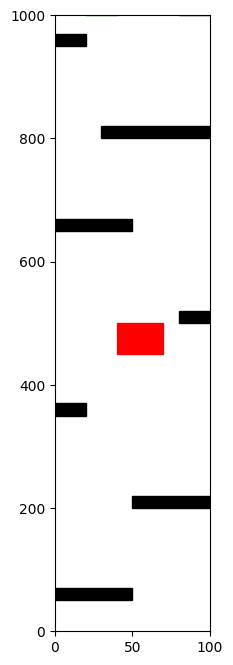

In [14]:
# Move to hitting the back of next obstacle
# while obstacle_coords_list[first_obstacle]["bry"] > vehicle_coords["vehicle"]["tly"]:
while len(obstacle_coords_list) != 0:

    # Horizontal Pass check
    if (obstacle_coords_list[first_obstacle]["brx"] <= vehicle_coords["vehicle"]["tlx"]) or (obstacle_coords_list[first_obstacle]["blx"] >= vehicle_coords["vehicle"]["trx"]):

        # Reset horizontal movement to zero
        VEHICLE_SPEED_X = 0

        # Vertical Pass check
        if obstacle_coords_list[first_obstacle]["try"] < vehicle_coords["vehicle"]["tly"]:

            # Calculate next obstacle
            del obstacle_coords_list[first_obstacle]

            if len(obstacle_coords_list) != 0:
                first_obstacle = list(obstacle_coords_list.keys())[0]
                v_bly = obstacle_coords_list[first_obstacle]["bly"]

                for k, v in obstacle_coords_list.items():
                    if v_bly >= v["bly"]:
                        first_obstacle = k
                        v_bly = v["bly"]
            else:
                continue

    # If horizontal pass does not check and vehicle need to steer towards right or left
    elif VEHICLE_SPEED_X == 0:

        # Decide which direction to steer - left or right
        dist_tosteer_right = obstacle_coords_list[first_obstacle]["brx"] - vehicle_coords["vehicle"]["tlx"]
        dist_tosteer_left = obstacle_coords_list[first_obstacle]["blx"] - vehicle_coords["vehicle"]["trx"]
        dist_gap_left = obstacle_coords_list[first_obstacle]["blx"] - X_MIN
        dist_gap_right = X_MAX - obstacle_coords_list[first_obstacle]["brx"]

        # VEHICLE_SPEED_X = min(dist_tosteer_right, dist_tosteer_left) / ((obstacle_coords_list[first_obstacle]["bry"] - vehicle_coords["vehicle"]["tly"]) / VEHICLE_SPEED_Y)
        if (dist_gap_left == 0) & (dist_gap_right == 0):
            break
        elif dist_gap_left >= dist_gap_right:
            VEHICLE_SPEED_X = dist_tosteer_left / ((obstacle_coords_list[first_obstacle]["bry"] - vehicle_coords["vehicle"]["tly"]) / VEHICLE_SPEED_Y)
        else:
            VEHICLE_SPEED_X = dist_tosteer_right / ((obstacle_coords_list[first_obstacle]["bry"] - vehicle_coords["vehicle"]["tly"]) / VEHICLE_SPEED_Y)
        
        if VEHICLE_SPEED_X > 0:
            VEHICLE_SPEED_X = np.ceil(VEHICLE_SPEED_X)
        else:
            VEHICLE_SPEED_X = np.floor(VEHICLE_SPEED_X)

    fig = plt.figure(figsize = (2, 8))
    ax = fig.add_subplot(111)

    VEHICLE_X = VEHICLE_X + VEHICLE_SPEED_X
    VEHICLE_Y = VEHICLE_Y + VEHICLE_SPEED_Y

    vehicle, vehicle_coords = road_item("vehicle", VEHICLE_X, VEHICLE_Y, VEHICLE_WIDTH, VEHICLE_LENGTH, 'green')

    obstacle_left1, obstacle_left1_coords = road_item("obstacle_left1", 0, 50, 50, OBSTACLE_WIDTH, 'black')
    obstacle_left2, obstacle_left2_coords = road_item("obstacle_left2", 0, 350, 20, OBSTACLE_WIDTH, 'black')
    obstacle_left3, obstacle_left3_coords = road_item("obstacle_left3", 0, 650, 50, OBSTACLE_WIDTH, 'black')
    obstacle_left4, obstacle_left4_coords = road_item("obstacle_left4", 0, 950, 20, OBSTACLE_WIDTH, 'black')

    obstacle_right1, obstacle_right1_coords = road_item("obstacle_right1", (100-50), 200, 50, OBSTACLE_WIDTH, 'black')
    obstacle_right2, obstacle_right2_coords = road_item("obstacle_right2", (100-20), 500, 20, OBSTACLE_WIDTH, 'black')
    obstacle_right3, obstacle_right3_coords = road_item("obstacle_right3", (100-70), 800, 70, OBSTACLE_WIDTH, 'black')
    obstacle_right4, obstacle_right4_coords = road_item("obstacle_right4", (100-20), 1000, 20, OBSTACLE_WIDTH, 'black')

    obstacle_moving1, obstacle_moving1_coords = road_item("obstacle_moving1", OBSTACLE_MOVING_X, OBSTACLE_MOVING_Y, OBSTACLE_MOVING_WIDTH, OBSTACLE_MOVING_LENGTH, 'red')

    ax.add_patch(vehicle)
    ax.add_patch(obstacle_left1)
    ax.add_patch(obstacle_left2)
    ax.add_patch(obstacle_left3)
    ax.add_patch(obstacle_left4)
    ax.add_patch(obstacle_right1)
    ax.add_patch(obstacle_right2)
    ax.add_patch(obstacle_right3)
    ax.add_patch(obstacle_right4)
    ax.add_patch(obstacle_moving1)

    plt.xlim([X_MIN, X_MAX]) 
    plt.ylim([Y_MIN, Y_MAX])

    plt.show()
    plt.pause(0.1)
    clear_output(wait=True)
